# Analysis of iModulons from scale-down experiments with substrate and/or oxygen oscillations

In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data
from pymodulon.plotting import *
import pymodulon
from pymodulon.enrichment import *

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore')

# import venn

In [3]:
# Loading it again (if resuming work)
ica_data_ddb = load_json_model("../data/ica_data/ica_data.json")
ica_data_ddb_self_centered = load_json_model("../data/ica_data/ica_data_self_centered.json")
ica_data = load_json_model("../data/ica_data/ecoli_p1k.json")
ica_data_combined = load_json_model("../data/ica_data/ica_data_combined_with_p1k.json")

# Display project:condition names

In [4]:
ica_data_ddb.sample_table.project

PD_131_R10_S1_1    DDB_SD_2
PD_131_R10_S2_1    DDB_SD_2
PD_131_R11_S1_1    DDB_SD_2
PD_131_R11_S2_1    DDB_SD_2
PD_131_R12_S1_1    DDB_SD_2
PD_131_R12_S2_1    DDB_SD_2
PD_131_R13_S1_1    DDB_SD_2
PD_131_R13_S2_1    DDB_SD_2
PD_131_R14_S1_1    DDB_SD_2
PD_131_R15_S1_1    DDB_SD_2
PD_131_R16_S1_1    DDB_SD_2
PD_131_R5_S1_1     DDB_SD_2
PD_131_R6_S1_1     DDB_SD_2
PD_131_R7_S1_1     DDB_SD_2
PD_131_R8_S1_1     DDB_SD_2
PD_131_R8_S2_1     DDB_SD_2
PD_131_R9_S1_1     DDB_SD_2
PD_131_R9_S2_1     DDB_SD_2
Name: project, dtype: object

In [5]:
for project in ica_data_ddb.sample_table.project.unique():
    for condition in ica_data_ddb.sample_table.condition.unique():
        print(project+":"+condition)

DDB_SD_2:WT_fed-batch_S_oscillation_feast
DDB_SD_2:WT_fed-batch_S_oscillation_famine
DDB_SD_2:WT_fed-batch_O_oscillation_limitation
DDB_SD_2:WT_fed-batch_O_oscillation_excess
DDB_SD_2:WT_fed-batch_S_O_oscillation_combined
DDB_SD_2:WT_fed-batch_control


# Making iModulon category groups

In [6]:
def get_systems_category_group_dict(iMs):
    df = ica_data.imodulon_table.system_category.loc[iMs]
    df = df.sort_values(ascending=True)
    my_dict = df.to_dict()
    return my_dict

In [7]:
def get_function_category_group_dict(iMs):
    df = ica_data.imodulon_table.functional_category.loc[iMs]
    df = df.sort_values(ascending=True)
    my_dict = df.to_dict()
    return my_dict

# Explained Variance

In [8]:
rec_var = {}
for k in ica_data_ddb_self_centered.imodulon_names:
    rec_var[k] = explained_variance(ica_data_ddb_self_centered,imodulons=k)
df_rec_var = pd.Series(rec_var)
df_rec_var = df_rec_var.sort_values(ascending=False)
df_rec_var.head(10)

gcvB              0.096181
RpoS              0.039661
Crp-2             0.024515
ppGpp             0.019926
Osmoprotectant    0.014368
EvgA              0.013342
UC-3              0.009345
Glycolate         0.009112
Salicylic Acid    0.009082
Efflux Pump       0.009005
dtype: float64

Text(0.5, 0, 'Fraction of Explained Variance')

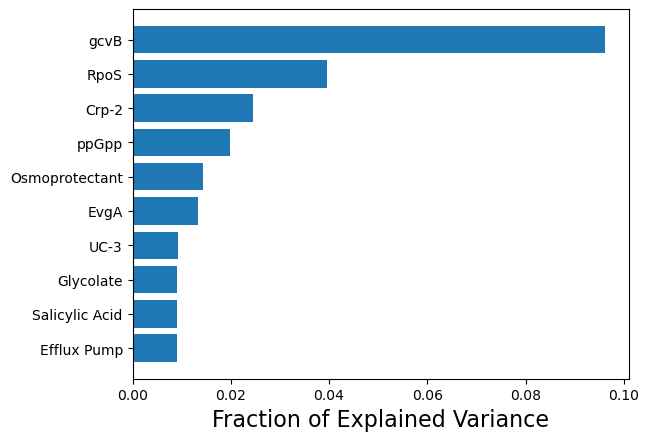

In [9]:
plt.barh(range(10,0,-1),df_rec_var.head(10),tick_label = df_rec_var.head(10).index)
plt.xlabel('Fraction of Explained Variance',fontsize=16)

# DiMA comparison within the same culture: Is there a short-term effect?

## Substrate scale-down

In [10]:
sample_1 = "DDB_SD_2:WT_fed-batch_S_oscillation_feast"
sample_2 = "DDB_SD_2:WT_fed-batch_S_oscillation_famine"

,difference,pvalue,qvalue,0,1
UC-8,8.750238,0.003318,0.177758,15.232801,23.983040
Translation,7.350495,0.019687,0.185638,-15.707911,-8.357415
Arginine,6.550884,0.020102,0.185638,-10.035274,-3.484389
ppGpp,-13.360585,0.007959,0.177758,-5.754139,-19.114724


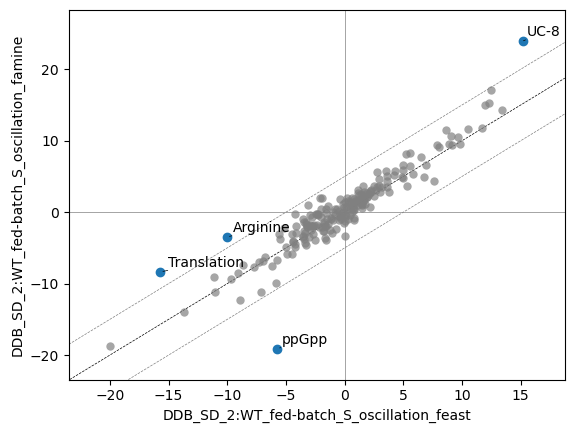

In [11]:
ax, table = plot_dima(
    ica_data_combined,
    sample_1,
    sample_2,
    fdr=1,
    threshold=5,
    line45_margin=5,
    table=True
)
table

In [12]:
feast_famine_dima_groups = get_systems_category_group_dict(table.index)
feast_famine_dima_groups

{'Arginine': 'Metabolism',
 'ppGpp': 'Stress Responses',
 'Translation': 'Translation',
 'UC-8': 'Unknown'}

## Oxygen scale-down

In [13]:
sample_1 = "DDB_SD_2:WT_fed-batch_O_oscillation_excess"
sample_2 = "DDB_SD_2:WT_fed-batch_O_oscillation_limitation"

,difference,pvalue,qvalue


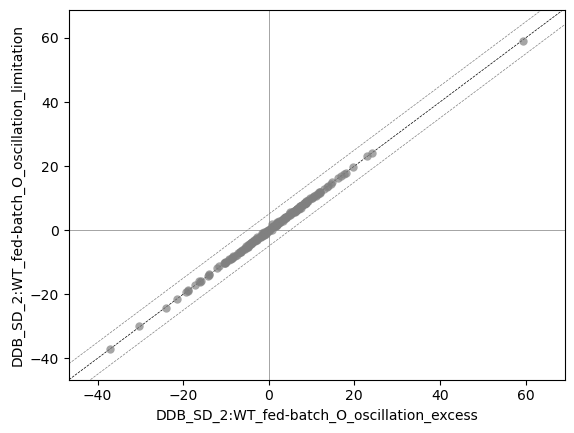

In [14]:
ax, table = plot_dima(
    ica_data_ddb,
    sample_1,
    sample_2,
    fdr=1,
    line45_margin=5,
    table=True,
    label=False
)
table

# DiMA comparison against the control: Is there a long-term effect?

## Substrate scale-down

In [15]:
sample_1 = "DDB_SD_2:WT_fed-batch_control"
sample_2 = list(ica_data_ddb.sample_table[ica_data_ddb.sample_table["oscillation"] == "S"].index)

,difference,pvalue,qvalue,0,1
Cysteine-1,3.420940,0.053308,0.988385,-6.916527,-3.495587
Sulfate,3.138444,0.006583,0.988385,0.450711,3.589155
UC-8,2.123502,0.078420,0.988385,17.484418,19.607920
Zinc-1,-2.131816,0.052275,0.988385,3.385619,1.253804
Putrescine,-2.764956,0.028364,0.988385,-5.207779,-7.972736


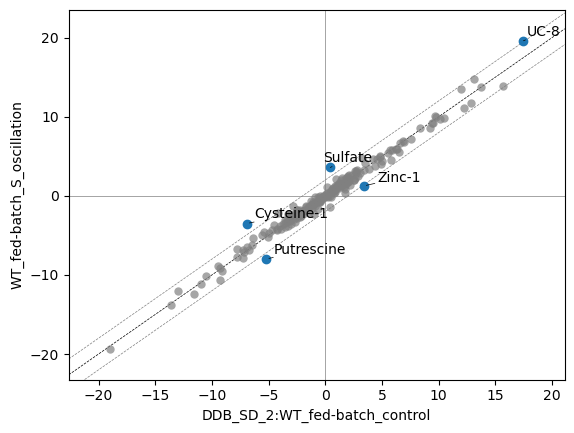

In [16]:
ax, table = plot_dima(
    ica_data_combined,
    sample_1,
    sample_2,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True
)

plt.ylabel("WT_fed-batch_S_oscillation");

table

## Oxygen scale-down

In [17]:
sample_1 = "DDB_SD_2:WT_fed-batch_control"
sample_2 = list(ica_data_ddb.sample_table[ica_data_ddb.sample_table["oscillation"] == "O"].index)

,difference,pvalue,qvalue,0,1
gcvB,61.405127,0.000034,0.000425,-2.087147,59.317980
EvgA,22.019597,0.000013,0.000295,2.097443,24.117040
Osmoprotectant,20.743306,0.000006,0.000295,-7.189156,13.554150
Efflux Pump,17.454539,0.000029,0.000416,-2.451330,15.003209
Membrane,17.367161,0.000002,0.000241,-10.521251,6.845911
Salicylic Acid,17.217727,0.000002,0.000241,-3.358189,13.859538
YjfJ,16.911337,0.000009,0.000295,0.629915,17.541252
Cold Shock,16.742799,0.000248,0.001107,6.243961,22.986760
Thr/Ser-1,16.421704,0.000017,0.000341,-1.941592,14.480112
Biofilm,15.776693,0.000261,0.001115,1.012946,16.789639


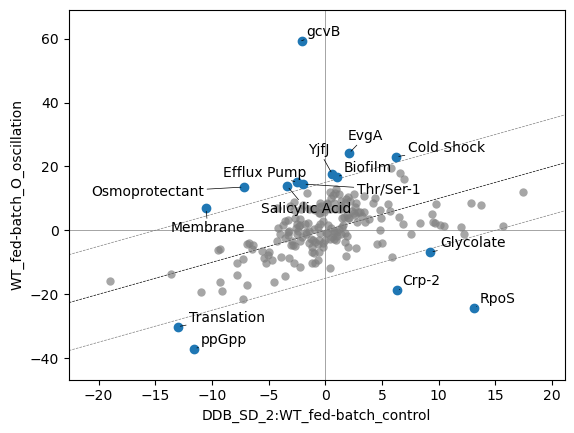

In [18]:
ax, table = plot_dima(
    ica_data_combined,
    sample_1,
    sample_2,
    fdr=1,
    threshold = 15,
    line45_margin=15,
    table=True
)

plt.ylabel("WT_fed-batch_O_oscillation");

table

In [19]:
oxygen_dima_groups = get_systems_category_group_dict(table.index)
oxygen_dima_groups

{'gcvB': 'Metabolism',
 'Thr/Ser-1': 'Metabolism',
 'Glycolate': 'Metabolism',
 'Crp-2': 'Metabolism',
 'EvgA': 'Stress Responses',
 'Osmoprotectant': 'Stress Responses',
 'Efflux Pump': 'Stress Responses',
 'Membrane': 'Stress Responses',
 'Salicylic Acid': 'Stress Responses',
 'YjfJ': 'Stress Responses',
 'Cold Shock': 'Stress Responses',
 'Biofilm': 'Stress Responses',
 'ppGpp': 'Stress Responses',
 'RpoS': 'Stress Responses',
 'Translation': 'Translation'}

## Substrate and oxygen scale-down

In [20]:
sample_1 = "DDB_SD_2:WT_fed-batch_control"
sample_2 = "DDB_SD_2:WT_fed-batch_S_O_oscillation_combined"

,difference,pvalue,qvalue,0,1
Osmoprotectant,10.878199,0.000101,0.002026,-7.189156,3.689043
Salicylic Acid,10.692218,0.000030,0.001019,-3.358189,7.334030
Glycolate,-10.766061,0.000059,0.001310,9.266736,-1.499325
Curli-2,-12.508228,0.000122,0.002167,15.688681,3.180453
Crp-1,-13.151051,0.002343,0.011584,13.774553,0.623503
GadXW,-14.625308,0.000483,0.005660,2.724591,-11.900717
Curli-1,-14.825421,0.000018,0.001019,12.866116,-1.959305
Acetate,-15.784355,0.000009,0.001019,12.262870,-3.521485
UC-3,-18.138643,0.000028,0.001019,5.902223,-12.236420
Crp-2,-22.497181,0.000129,0.002167,6.305917,-16.191264


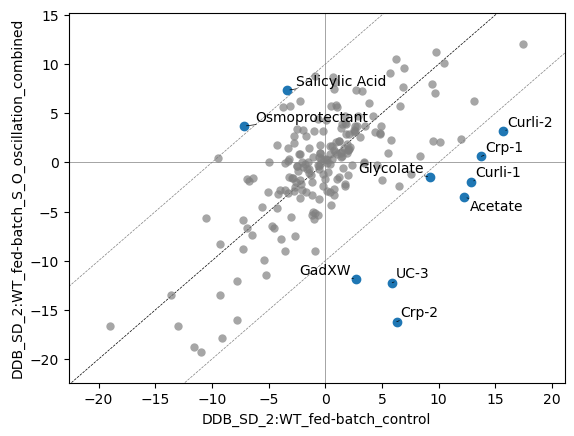

In [21]:
ax, table = plot_dima(
    ica_data_combined,
    sample_1,
    sample_2,
    fdr=1,
    threshold=10,
    line45_margin=10,
    table=True
)
table

In [22]:
so_dima_groups = get_systems_category_group_dict(table.index)
so_dima_groups

{'Glycolate': 'Metabolism',
 'Crp-1': 'Metabolism',
 'Acetate': 'Metabolism',
 'Crp-2': 'Metabolism',
 'Osmoprotectant': 'Stress Responses',
 'Salicylic Acid': 'Stress Responses',
 'Curli-2': 'Stress Responses',
 'GadXW': 'Stress Responses',
 'Curli-1': 'Stress Responses',
 'UC-3': 'Unknown'}

# Clusters of DiMA iModulons

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [24]:
df = pd.concat(
    [pd.DataFrame.from_dict(data=so_dima_groups, orient="index").reset_index(), 
     pd.DataFrame.from_dict(data=oxygen_dima_groups, orient="index").reset_index(),
     pd.DataFrame.from_dict(data=feast_famine_dima_groups, orient="index").reset_index()
    ]
)

iMs = list(df.drop_duplicates("index")["index"])
iMs

['Glycolate',
 'Crp-1',
 'Acetate',
 'Crp-2',
 'Osmoprotectant',
 'Salicylic Acid',
 'Curli-2',
 'GadXW',
 'Curli-1',
 'UC-3',
 'gcvB',
 'Thr/Ser-1',
 'EvgA',
 'Efflux Pump',
 'Membrane',
 'YjfJ',
 'Cold Shock',
 'Biofilm',
 'ppGpp',
 'RpoS',
 'Translation',
 'Arginine',
 'UC-8']

In [25]:
A_filtered = ica_data_ddb.A.loc[iMs]

In [26]:
### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = ica_data.imodulon_table.loc[list(A_filtered.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)

### Color definition for the strains
cmap = cm.get_cmap(name="tab10")
strain = ica_data_ddb.sample_table["condition"]

col_palette = dict(zip(strain.unique(), [cmap(x) for x in range(0,len(strain.unique()))]))
col_colors = strain.map(col_palette)

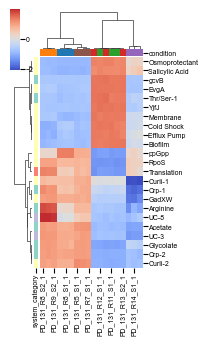

In [27]:
# formatting
plt.rcParams['font.size'] = 5
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

g = sns.clustermap(
    data = A_filtered,
    figsize=(2, 3.4),
    dendrogram_ratio=0.15,
    cmap="coolwarm",
    center=0,
    z_score=0,
    col_colors=col_colors,
    row_colors=row_colors,
    # metric="correlation"
)
# plt.savefig("clustermap_fig4.svg", dpi=900)

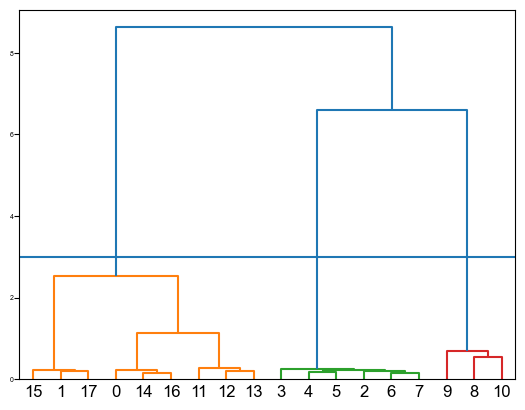

In [28]:
thr = 8.65
thr = 3.0
d = dendrogram(
    Z = g.dendrogram_col.linkage,
    color_threshold = thr,
    no_plot=False,
);
plt.hlines(y=thr,xmin=0,xmax=200)

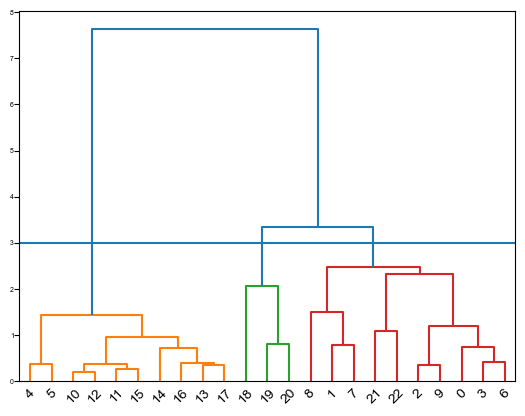

In [29]:
thr = 7.65
thr = 3
d = dendrogram(
    Z = g.dendrogram_row.linkage,
    color_threshold = thr,
    no_plot=False
);
plt.hlines(y=thr,xmin=0,xmax=300)

## Growth phase dependency of iModulon activities

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [31]:
df = pd.concat(
    [pd.DataFrame.from_dict(data=so_dima_groups, orient="index").reset_index(), 
     pd.DataFrame.from_dict(data=oxygen_dima_groups, orient="index").reset_index(),
     pd.DataFrame.from_dict(data=feast_famine_dima_groups, orient="index").reset_index()
    ]
)

iMs = list(df.drop_duplicates("index")["index"])
iMs

['Glycolate',
 'Crp-1',
 'Acetate',
 'Crp-2',
 'Osmoprotectant',
 'Salicylic Acid',
 'Curli-2',
 'GadXW',
 'Curli-1',
 'UC-3',
 'gcvB',
 'Thr/Ser-1',
 'EvgA',
 'Efflux Pump',
 'Membrane',
 'YjfJ',
 'Cold Shock',
 'Biofilm',
 'ppGpp',
 'RpoS',
 'Translation',
 'Arginine',
 'UC-8']

In [37]:
new_iMs = [
    'Glycolate',
    'Crp-1',
    'Acetate',
    'Crp-2',
    'Curli-2',
    'GadXW',
    'Curli-1',
    'UC-3',
    # 'ppGpp',
    # 'RpoS',
    # 'Translation',
    'Arginine',
    'UC-8'
]

In [38]:
# The studies DDB2 and DDB3 contain samples from batch and feed phase of high-density fed-batch experiments
sample_table_filtered = ica_data.sample_table[(ica_data.sample_table.study == "DDB2") | (ica_data.sample_table.study == "DDB3")]
A_filtered = ica_data.A.loc[new_iMs][sample_table_filtered.index]

In [39]:
### Color definition for the iM categories
cmap = cm.get_cmap(name="Set3")
category = ica_data.imodulon_table.loc[list(A_filtered.index)]["system_category"]

row_palette = dict(zip(category.unique(), [cmap(x) for x in range(0,len(category.unique()))]))
row_colors = category.map(row_palette)

### Color definition for the strains
cmap = cm.get_cmap(name="tab10")
growth_phase = sample_table_filtered["Culture Type"]

col_palette = dict(zip(growth_phase.unique(), [cmap(x) for x in range(0,len(growth_phase.unique()))]))
col_colors = growth_phase.map(col_palette)

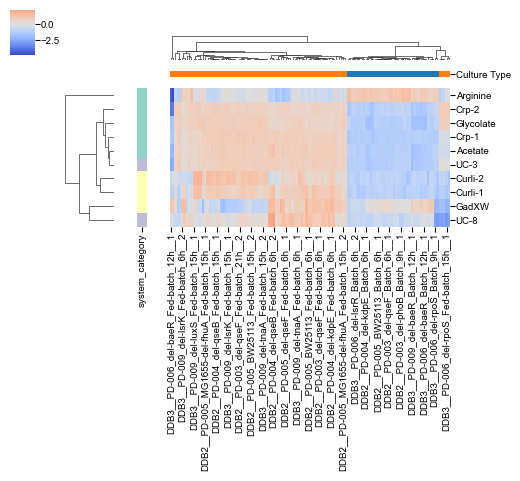

In [49]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

g = sns.clustermap(
    data = A_filtered,
    figsize=(5, 2.5),
    dendrogram_ratio=0.15,
    cmap="coolwarm",
    center=0,
    z_score=0,
    col_colors=col_colors,
    row_colors=row_colors,
    # metric="correlation"
)
plt.savefig("clustermap_of_carbon_limitation_iMs.svg", dpi=900)